In [1]:
# Import lib yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
# Get the data
data = pd.read_json('data.json')
df = pd.DataFrame(data)

df.fillna(0, inplace=True)
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'male' else 1)
df


,id,age,sex,job,housing,purpose,avg_saving_balance,avg_checking_balance,avg_credit_amt,avg_duration,default
0,350890805089992,18,0,0.0,free,phone,3.641077,45.433891,142.879925,8.280582,0
1,11245003525183,59,1,0.0,own,education,8.223161,69.884568,574.985447,21.562853,1
2,358755057148774,51,1,3.0,rent,education,1.826520,24.613184,418.298206,1.216065,0
3,358031066572903,37,0,2.0,rent,phone,3.311494,43.763247,2300.630079,17.771295,1
4,356996017697235,60,0,0.0,own,phone,0.803782,42.608367,24.525963,8.616881,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,353160043662225,39,0,2.0,free,house,12.888391,11.911161,450.483669,18.118020,0
9996,13006001597857,27,0,2.0,rent,vehicle,24.844367,8.452849,1206.897594,6.570920,0
9997,11612002595253,24,0,3.0,own,phone,8.517402,15.715699,199.544103,2.594882,0
9998,359254067341065,39,1,3.0,own,house,7.356829,19.250413,1771.071414,43.271821,0


In [3]:
# Exploratory Data Analysis

# Mean
def calculate_mean(values):
    total = sum(values)
    return total / len(values)

# Median
def calculate_median(values):
    sorted_values = sorted(values)
    length = len(sorted_values)

    if length % 2 == 0:
        mid1 = sorted_values[length // 2 - 1]
        mid2 = sorted_values[length // 2]
        median = (mid1 + mid2) / 2
    else:
        median = sorted_values[length // 2]
    
    return median

# Kuartil
def calculate_quartiles(values):
    sorted_values = sorted(values)
    length = len(sorted_values)

    q1_index = length // 4
    q3_index = q1_index * 3

    q1 = sorted_values[q1_index]
    q3 = sorted_values[q3_index]

    return q1, q3

# Analysis all attributes
numeric_attributes = ['age', 'avg_saving_balance', 'avg_checking_balance', 'avg_credit_amt', 'avg_duration']
for attribute in numeric_attributes:
    dataAttribute = df[attribute]
    mean = calculate_mean(dataAttribute)
    median = calculate_median(dataAttribute)
    q1, q3 = calculate_quartiles(dataAttribute)
    print(f"{attribute}")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Q1: {q1}")
    print(f"Q3: {q3}")
    print()

age
Mean: 38.3794
Median: 39.0
Q1: 27
Q3: 50

avg_saving_balance
Mean: 12.027619759400878
Median: 10.65935819275
Q1: 5.2641037545
Q3: 17.3866926888

avg_checking_balance
Mean: 23.319986486083334
Median: 21.19610693085
Q1: 10.2175023368
Q3: 33.53299336

avg_credit_amt
Mean: 1114.040688525209
Median: 979.3137996115
Q1: 508.4360932955
Q3: 1541.4925072338

avg_duration
Mean: 18.79487377706915
Median: 15.91710353505
Q1: 7.6111796442
Q3: 26.8560276822



In [4]:
# Model building
X = df[['age', 'sex', 'avg_saving_balance', 'avg_checking_balance', 'avg_credit_amt', 'avg_duration']]
y = df[['default']]

X = sm.add_constant(X)
model = sm.Logit(y, X)
result = model.fit()

# print(result.summary())
result.summary()


Optimization terminated successfully.
         Current function value: 0.643347
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 Aug 2023   Pseudo R-squ.:                0.009329
Time:                        10:03:36   Log-Likelihood:                -6433.5
converged:                       True   LL-Null:                       -6494.1
Covariance Type:            nonrobust   LLR p-value:                 9.271e-24
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.0197      0.101    -10.114      0.000      -1.217      -0.822
age                      0.0032      0.002      1.961      0.050    2.35e-06       0.006
sex                      0.0417      0.046      0.908      0.364      -0.048       0.132
avg_saving_balance       0.0085      0.003      2.910      0.004       0.003       0.014
avg_checking_balance    -0.0068      0.002     -4.429      0.000      -0.010      -0.004
avg_credit_amt        9.146e-05    3.8e-05      2.405      0.016    1.69e-05       0.000
avg_duration             0.0111      0.002      5.102      0.000       0.007       0.015
========================================================================================
"""

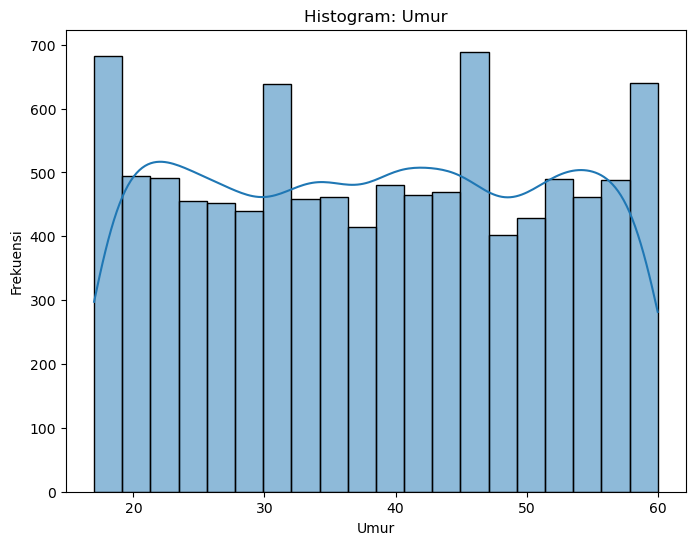

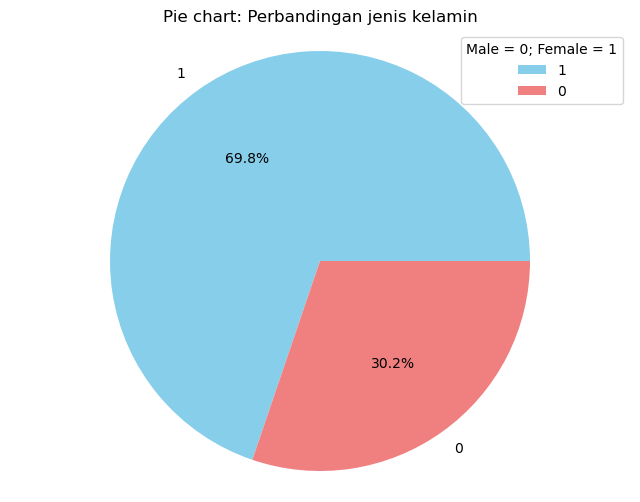

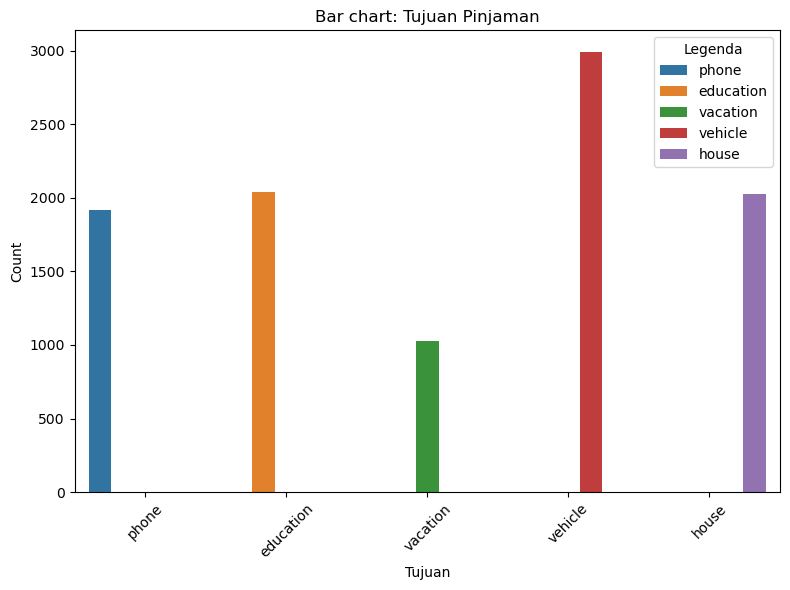

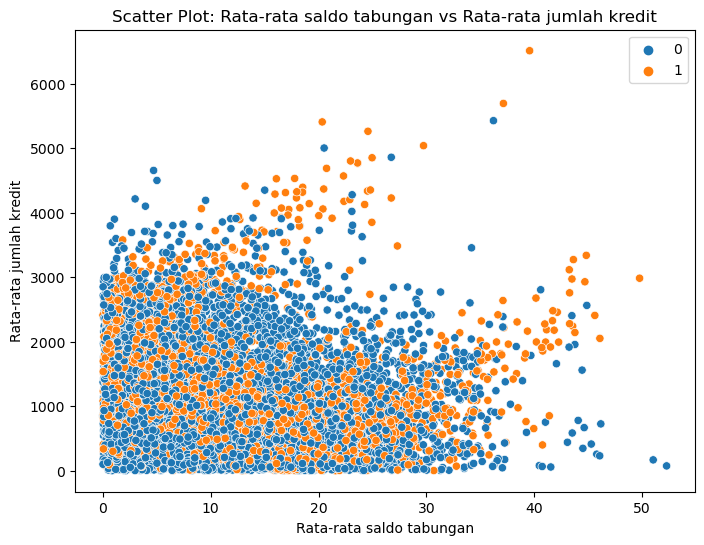

In [5]:
# Visualize the results

# Visual Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df['age'], bins=20, kde=True)
plt.title('Histogram: Umur')
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.show()

# Visual Gender
gender_counts = df['sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Pie chart: Perbandingan jenis kelamin')
plt.axis('equal')
plt.legend(title='Male = 0; Female = 1')
plt.show()

# Visual Loan Purpose
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='purpose', hue='purpose')
plt.title('Bar chart: Tujuan Pinjaman')
plt.xlabel('Tujuan')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Legenda')
plt.tight_layout()
plt.show()


# Visual of Avg Saving Balance vs Avg Credit Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='avg_saving_balance', y='avg_credit_amt', hue='default')
plt.title('Scatter Plot: Rata-rata saldo tabungan vs Rata-rata jumlah kredit')
plt.xlabel('Rata-rata saldo tabungan')
plt.ylabel('Rata-rata jumlah kredit')
plt.legend()
plt.show()